Build a regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_features = pd.read_csv("../data/features.csv")
df_features

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
0,9.09,618.5,4.725,813.634974,10
1,8.90,824.0,4.675,852.302705,14
2,8.98,999.3,4.725,834.061440,17
3,9.13,584.4,4.750,777.232101,16
4,9.22,709.7,4.775,689.425498,9
...,...,...,...,...,...
109,9.14,782.5,4.675,690.606529,0
110,9.09,646.9,4.800,625.914671,0
111,9.23,433.1,4.875,676.468985,16
112,9.14,567.5,4.775,768.840359,21


In [5]:
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
Average_rating_F,1.000000,-0.004513,0.855557,-0.243149,0.128112
Average_dist_F,-0.004513,1.000000,0.009763,0.329463,-0.241534
Average_rating_Y,0.855557,0.009763,1.000000,-0.147352,0.075879
Average_distance_Y,-0.243149,0.329463,-0.147352,1.000000,0.146536
Number of Bikes,0.128112,-0.241534,0.075879,0.146536,1.000000


In [6]:
y = df_features['Number of Bikes']
X = df_features[['Average_distance_Y', 'Average_rating_F', 'Average_dist_F']]
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.head()

,const,Average_distance_Y,Average_rating_F,Average_dist_F
0,1.0,813.634974,9.09,618.5
1,1.0,852.302705,8.90,824.0
2,1.0,834.061440,8.98,999.3
3,1.0,777.232101,9.13,584.4
4,1.0,689.425498,9.22,709.7


In [7]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)

Provide model output and an interpretation of the results. 

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     6.656
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           0.000358
Time:                        21:55:28   Log-Likelihood:                -422.25
No. Observations:                 114   AIC:                             852.5
Df Residuals:                     110   BIC:                             863.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -74.2776     40

In [ ]:
# Interpretation Summary

Overall, the model suggests that the characteristics of the POIs have a statistically significant impact on the estimated Number of bikes for a given station. 


However the Adj. R-squared indicating the goodness of fit of the model shows that around 13% of the variability in Number of bikes can be explained by the independent variables.

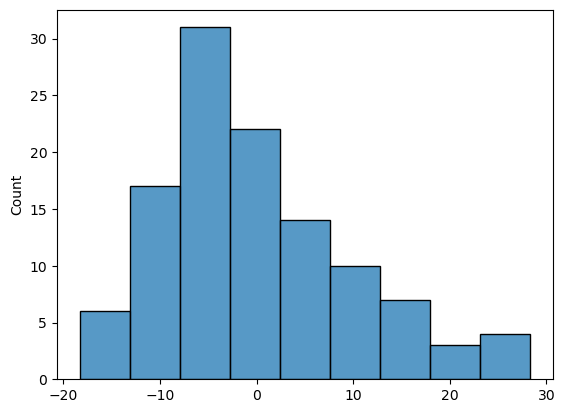

In [9]:
residuals = results.resid

sns.histplot(residuals)
plt.show()

In [10]:
# To extract the co-efficients
results.params

const                -74.277596
Average_distance_Y     0.037074
Average_rating_F       9.201621
Average_dist_F        -0.035789
dtype: float64

In [16]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F

b0 = results.params['const']
b1 = results.params['Average_distance_Y']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

known_distance_Y = 585
known_rating = 9
known_dist_F = 777
predicted_num_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F
predicted_num_bikes


2.4172871567764105

# Stretch

How can you turn the regression model into a classification model?